In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import games

import TSPM
import PM_DMED
import cbp
import randcbp
import bpm
import randcbp

class Evaluation:

    def __init__(self, horizon,type ):
        self.type = type
        self.horizon = horizon

    def get_outcomes(self, game):
        outcomes = np.random.choice( game.n_outcomes , p= list( game.outcome_dist.values() ), size= self.horizon) 
        return outcomes

    def get_feedback(self, game, action, outcome):
        return game.FeedbackMatrix[ action ][ outcome ]

    def eval_policy_once(self, alg, game, job):

        alg.reset()

        distribution, jobid = job

        np.random.seed(jobid)

        outcome_distribution =  {'spam':distribution[0],'ham':distribution[1]}

        game.set_outcome_distribution( outcome_distribution, jobid )

        action_counter = np.zeros( (game.n_actions, self.horizon) )
        outcomes = self.get_outcomes(game)

        for t in range(self.horizon):

            # policy chooses one action
            action = alg.get_action(t)

            # Environment chooses one outcome
            outcome = outcomes[t]

            # print('t', t, 'action', action, 'outcome', outcome, )
            feedback =  self.get_feedback( game, action, outcome )

            alg.update(action, feedback, outcome, None, t)

            for i in range(game.n_actions):
                if i == action:
                    action_counter[i][t] = action_counter[i][t-1] +1
                else:
                    action_counter[i][t] = action_counter[i][t-1]

        regret = np.array( [ game.delta(i) for i in range(game.n_actions) ] ).T @ action_counter

        return regret

n-actions 2 n-outcomes 2 alphabet 3
n-actions 2 n-outcomes 2
n-actions 2 n-outcomes 2
n-actions 2 n-outcomes 2
n-actions 3 n-outcomes 2 alphabet 3
n-actions 3 n-outcomes 2
n-actions 3 n-outcomes 2
n-actions 3 n-outcomes 2


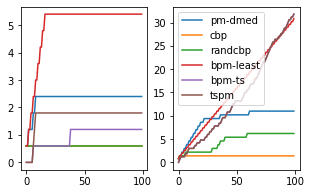

In [3]:
horizon = 100
jobid = 3
p = 0.8
job = [p, 1-p], jobid 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

for ax, game in enumerate( [  games.apple_tasting(False), games.label_efficient() ] ):

    ev = Evaluation(horizon, None)

    ###### PM-DMED:
    c =1 
    alg = PM_DMED.PM_DMED( game, horizon, c) 
    result_pmdmed = ev.eval_policy_once(alg, game, job)

    ###### CBP:
    alpha = 1.01
    alg = cbp.CBP(  game, horizon, alpha )
    result_cbp = ev.eval_policy_once(alg, game, job)

    ###### RandCBP:
    alpha = 1.01
    sigma = 1
    K = 20
    epsilon = 10e-7
    alg = randcbp.RandCBP(  game, horizon, alpha, sigma, K, epsilon) 
    result_randcbp = ev.eval_policy_once(alg, game, job)

    ###### BPMleast:
    alg = bpm.BPM(  game, horizon )
    result_bpmleast = ev.eval_policy_once(alg, game, job)

    ##### BPM-TS:
    R = 0
    alg = TSPM.TSPM_alg(  game, horizon, R) 
    result_bpmts = ev.eval_policy_once(alg, game, job)

    ###### TSPM:
    R = 1
    alg = TSPM.TSPM_alg(  game,horizon, R) 
    result_tspm = ev.eval_policy_once(alg, game, job)

    axes[ax].plot(range(horizon), result_pmdmed, label = 'pm-dmed' )
    axes[ax].plot(range(horizon), result_cbp, label = 'cbp' )
    axes[ax].plot(range(horizon), result_randcbp, label = 'randcbp' )
    axes[ax].plot(range(horizon), result_bpmleast, label = 'bpm-least' )
    axes[ax].plot(range(horizon), result_bpmts, label = 'bpm-ts' )
    axes[ax].plot(range(horizon), result_tspm, label = 'tspm' )

plt.legend()